<a href="https://colab.research.google.com/github/DIPANJAN001/TalkJulia_with_Randy/blob/main/compare6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
df=pd.read_excel("/content/pv_10.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [131]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [132]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input

In [133]:
n_inputs=weather_input.shape[1]

In [134]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [135]:
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [136]:
 model.fit(weather_input,weather_input, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
192/192 - 2s - loss: 0.0907 - 2s/epoch - 8ms/step
Epoch 2/100
192/192 - 0s - loss: 0.0189 - 485ms/epoch - 3ms/step
Epoch 3/100
192/192 - 0s - loss: 0.0147 - 473ms/epoch - 2ms/step
Epoch 4/100
192/192 - 1s - loss: 0.0134 - 503ms/epoch - 3ms/step
Epoch 5/100
192/192 - 0s - loss: 0.0120 - 472ms/epoch - 2ms/step
Epoch 6/100
192/192 - 0s - loss: 0.0110 - 482ms/epoch - 3ms/step
Epoch 7/100
192/192 - 1s - loss: 0.0103 - 507ms/epoch - 3ms/step
Epoch 8/100
192/192 - 0s - loss: 0.0101 - 452ms/epoch - 2ms/step
Epoch 9/100
192/192 - 0s - loss: 0.0094 - 483ms/epoch - 3ms/step
Epoch 10/100
192/192 - 0s - loss: 0.0093 - 487ms/epoch - 3ms/step
Epoch 11/100
192/192 - 0s - loss: 0.0088 - 477ms/epoch - 2ms/step
Epoch 12/100
192/192 - 0s - loss: 0.0087 - 460ms/epoch - 2ms/step
Epoch 13/100
192/192 - 0s - loss: 0.0083 - 466ms/epoch - 2ms/step
Epoch 14/100
192/192 - 0s - loss: 0.0083 - 476ms/epoch - 2ms/step
Epoch 15/100
192/192 - 0s - loss: 0.0076 - 497ms/epoch - 3ms/step
Epoch 16/100
192/192 -

In [137]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [138]:
#solpow=solpow.to_numpy().reshape(-1,1)
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

192/192 [==============================] - 0s 1ms/step


In [139]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

192/192 [==============================] - 0s 1ms/step


In [140]:
num_steps = 2
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(X_train_encode,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [141]:
X_train, X_test, y_train, y_test = train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [142]:
inputs1=Input(shape=(X_train.shape[1],X_train.shape[2]))

In [143]:
from keras import optimizers
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/100
47/47 [==============================] - 15s 66ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2/100
47/47 [==============================] - 2s 36ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 3/100
47/47 [==============================] - 2s 36ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4/100
47/47 [==============================] - 2s 36ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 5/100
47/47 [==============================] - 2s 35ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 6/100
47/47 [==============================] - 2s 36ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 7/100
47/47 [==============================] - 2s 35ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 8/100
47/47 [==============================] - 2s 35ms/step - loss: 0

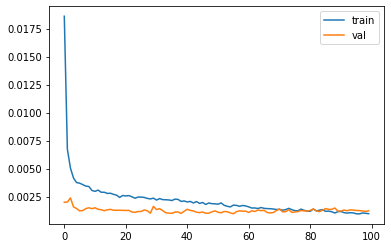

77/77 [==============================] - 2s 6ms/step


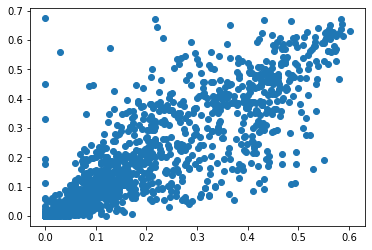

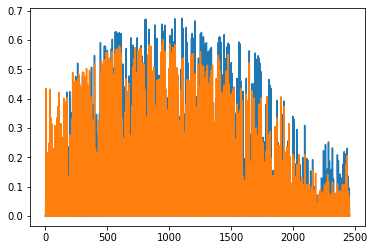

0.07332151593492955


In [144]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 100,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/200
47/47 [==============================] - 13s 65ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 2/200
47/47 [==============================] - 2s 36ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 3/200
47/47 [==============================] - 2s 36ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4/200
47/47 [==============================] - 2s 36ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 5/200
47/47 [==============================] - 2s 36ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/200
47/47 [==============================] - 2s 35ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 7/200
47/47 [==============================] - 2s 36ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 8/200
47/47 [==============================] - 2s 36ms/step - loss: 0

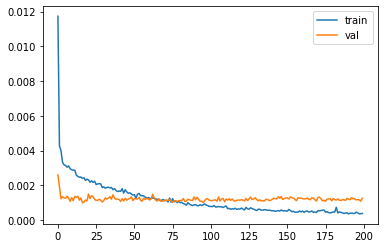

77/77 [==============================] - 2s 6ms/step


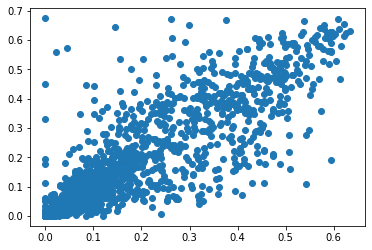

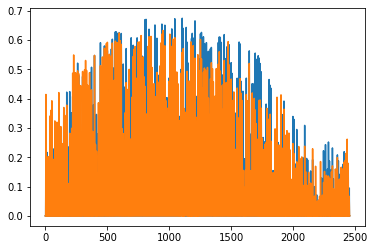

0.07340936691326987
0.035228596025522384


In [145]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [146]:
from keras.layers import Bidirectional


Epoch 1/100
47/47 [==============================] - 29s 137ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 2/100
47/47 [==============================] - 4s 79ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 3/100
47/47 [==============================] - 4s 78ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 4/100
47/47 [==============================] - 4s 78ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 5/100
47/47 [==============================] - 4s 77ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 6/100
47/47 [==============================] - 4s 81ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 7/100
47/47 [==============================] - 4s 82ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 8/100
47/47 [==============================] - 4s 78ms/step - loss: 

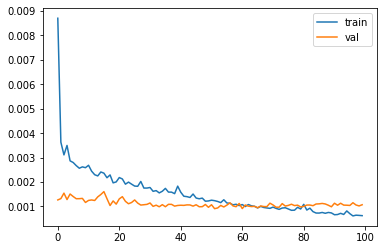

77/77 [==============================] - 4s 13ms/step


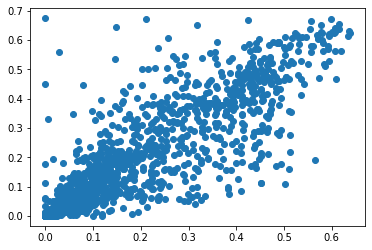

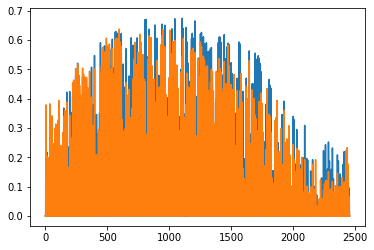

0.07192180582139673
0.03475457267807823


In [147]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [148]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/100
47/47 [==============================] - 28s 133ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2/100
47/47 [==============================] - 4s 77ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 3/100
47/47 [==============================] - 5s 102ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 4/100
16/47 [=========>....................] - ETA: 2s - loss: 0.0031 - mse: 0.0031

KeyboardInterrupt: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
SimRNN=Sequential()
SimRNN.add(SimpleRNN(20,return_sequences=True,input_shape=(2,20)))
SimRNN.add(SimpleRNN(20,return_sequences=True))
SimRNN.add(SimpleRNN(1))

In [ ]:
SimRNN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
SimRNN.summary()

In [ ]:
SimRNN.fit(X_train,y_train, epochs=200, batch_size=64, validation_split = 0.2)

In [ ]:
y=SimRNN.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [ ]:
regressor1 = Sequential()
regressor1.add(LSTM(units = 50, return_sequences = True, input_shape = (2,20)))
regressor1.add(Dropout(0.2))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50))
regressor1.add(Dropout(0.25))

regressor1.add(Dense(units = 1))

regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor1.fit(X_train, y_train, epochs = 200, batch_size = 64)

In [ ]:
y=regressor1.predict(X_test)

In [ ]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))